In [1]:
import logging
logging.basicConfig(level=logging.DEBUG)
import time
from sklearn.metrics import accuracy_score
from getData import getData
from ot_dis.mask_map import masking_map, masking_map_sequence, masking_map_partial, masking_map_sequence, masking_map_sequence_2d
from ot_dis.wtk import wtk_distance
from arabic_load import get_train_data, get_test_data
import seaborn as sns

DEBUG:matplotlib:matplotlib data path: c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:CONFIGDIR=C:\Users\Administrator\.matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is win32
DEBUG:matplotlib:CACHEDIR=C:\Users\Administrator\.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from C:\Users\Administrator\.matplotlib\fontlist-v330.json


In [2]:
import torch
import numpy as np
from getData import getData
from ot_dis.mask_map import masking_map, masking_map_sequence, masking_map_partial, masking_map_DT
from arabic_load import get_train_data, get_test_data
from ot_dis.wtk import wtk_distance

# 1. Load data

In [3]:
X_train, y_train, X_test, y_test = getData('BME', '../data/UCR/raw_data/')
xs, xt = X_train[8], X_test[9]

In [4]:
X_train_motion, y_train_motion, X_test_motion, y_test_motion = getData('BasicMotions', '../data/UCR/raw_data/')

In [5]:
X_train_china, y_train_china, X_test_china, y_test_china = getData('Chinatown', '../data/UCR/raw_data/')
xs_china, xt_china = X_train_china[8], X_test_china[9]

In [6]:
len(X_train), len(X_test), X_train[0].shape

(30, 150, (128,))

In [7]:
X_train_arabic, y_train_arabic = get_train_data()
X_test_arabic, y_test_arabic = get_test_data()
xs_arabic, xt_arabic = X_train_arabic[0], X_test_arabic[1210]

In [8]:
xs_arabic.shape, xt_arabic.shape

((38, 13), (7, 13))

# 2. Metrics proposal

## 2.1. WTK

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Administrator\\Documents\\WTK-distance\\venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-Italic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Administrator\\Documents\\WTK-distance\\venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\

(0.2819995880126953, 0.3253678601524448)

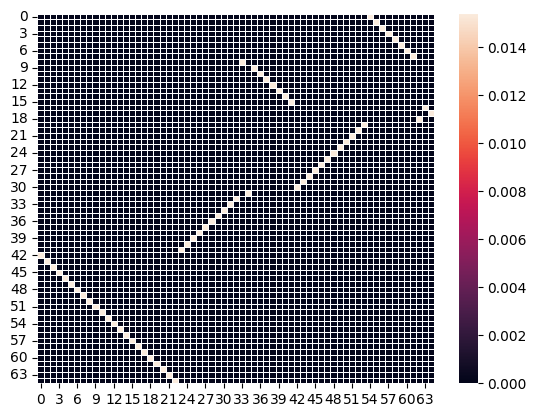

In [17]:
start_time = time.time()
pi_wtk, cost_wtk = wtk_distance(xs, xt, 64, plot=True)
end_time = time.time()
end_time - start_time, cost_wtk

## 2.2. Pure masking

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Administrator\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\t

(0.27899932861328125, 0.09945474145283412)

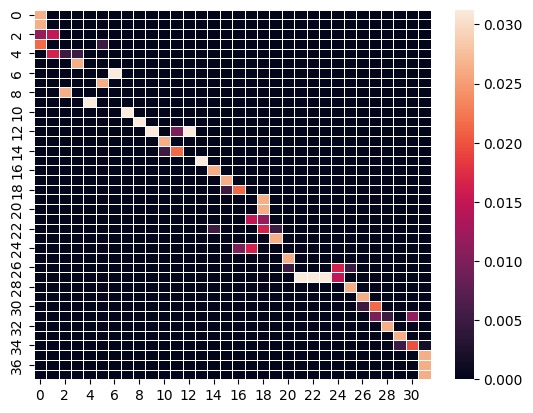

In [15]:
start_time = time.time()
pi_wtk, cost_wtk = masking_map(xs_arabic, xt_arabic, lamb=6,plot=True)
end_time = time.time()
end_time - start_time, cost_wtk

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x0000021B7D9F4A90>


(0.27699947357177734, 0.33052497231092093)

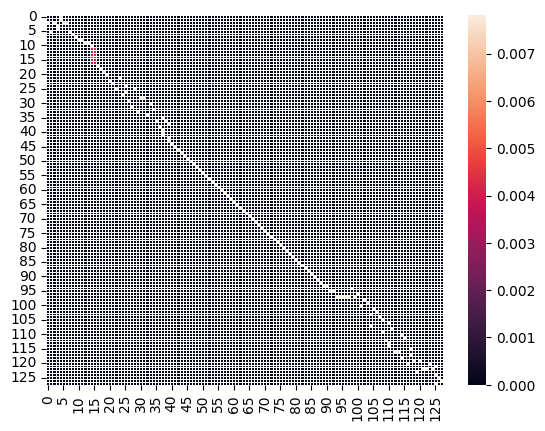

In [11]:
start_time = time.time()
pi_wtk, cost_wtk = masking_map(xs, xt, lamb=5,plot=True)
end_time = time.time()
end_time - start_time, cost_wtk

## 2.3. Partial masking

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x0000022659BCA150>


(0.11499953269958496, 23.26309753832218)

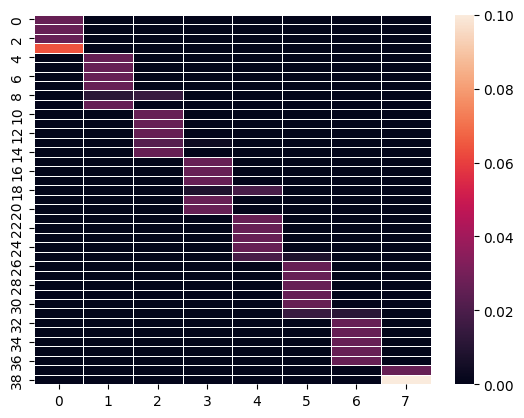

In [10]:
lamb = 4
start_time = time.time()
pi_kpg_sequence, cost_kpg_sequence = masking_map_partial(xs_arabic, xt_arabic, s=0.9, plot=True, lamb=lamb)
end_time = time.time()
end_time - start_time, cost_kpg_sequence

c:\Users\Administrator\Documents\WTK-distance\venv\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x000001B0003E9D90>


(0.22999978065490723, 20.10958627091861)

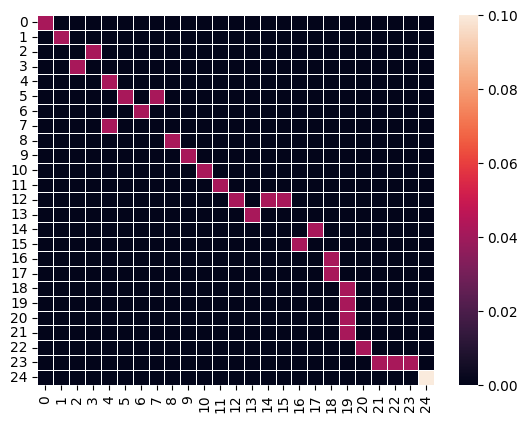

In [21]:
lamb = 4
start_time = time.time()
pi_kpg_sequence, cost_kpg_sequence = masking_map_partial(xs_china, xt_china, s=0.9, plot=True, lamb=lamb)
end_time = time.time()
end_time - start_time, cost_kpg_sequence

## 2.4. Sequence masking

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x000002618D4D0910>


(0.19099950790405273, 0.3583141423597276)

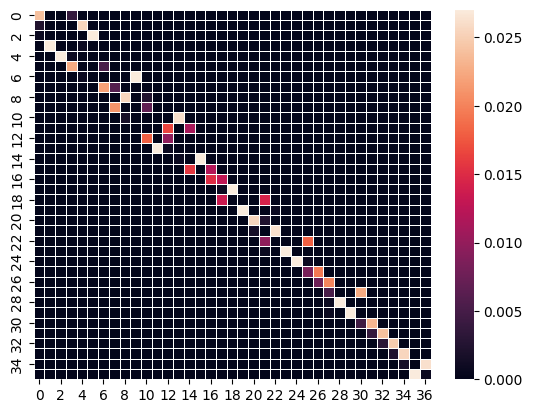

In [24]:
min_len = min(len(xt_arabic), len(xs_arabic))
sub_length = int(np.floor(min_len*50/100))
lamb = 1
start_time = time.time()
pi_wtk, cost_wtk = masking_map_sequence_2d(xs_arabic, X_train_arabic[3], plot=True, lamb=3, sub_length=2)
end_time = time.time()
end_time - start_time, cost_wtk

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x000002618A002110>


(0.2539992332458496, 0.33052497231092093)

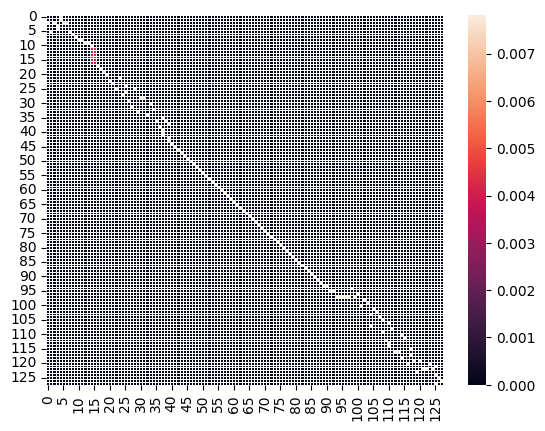

In [10]:
start_time = time.time()
pi_wtk, cost_wtk = masking_map(xs, xt, lamb=5,plot=True)
end_time = time.time()
end_time - start_time, cost_wtk

## 2.5. DT masking

In [8]:
start_time = time.time()
pi_wtk, cost_wtk = masking_map_DT(xs_arabic, xt_arabic, lamb=0.8,plot=True)
end_time = time.time()
end_time - start_time, cost_wtk

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


ValueError: cannot reshape array of size 1 into shape (7,38)

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x0000021B812C2F50>


(0.2689990997314453, 0.3382854427599636)

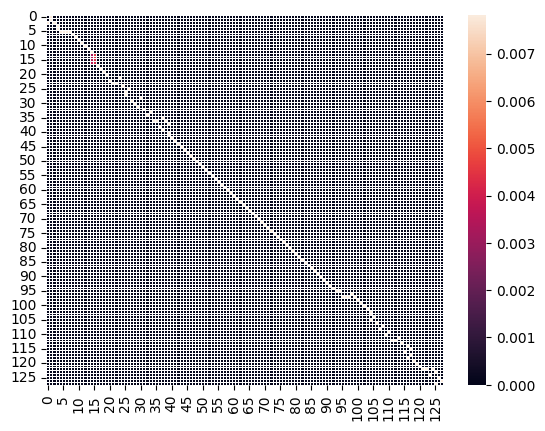

In [27]:
start_time = time.time()
pi_wtk, cost_wtk = masking_map(xs, xt, lamb=3,plot=True)
end_time = time.time()
end_time - start_time, cost_wtk

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x0000021B8117DE10>


(0.2089991569519043, 0.33828544275893857)

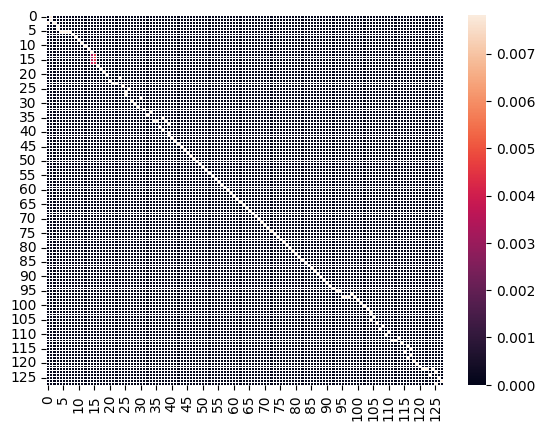

In [28]:
start_time = time.time()
pi_wtk_1, cost_wtk_1 = masking_map_DT(xs, xt,lamb=3,plot=True)
end_time = time.time()
end_time - start_time, cost_wtk_1

# 3. Visualize distance matrix difference

In [25]:
import seaborn as sns
def plot_difference(C1, C2):
    C = C1-C2
    sns.heatmap(C, linewidth=0.5)

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x0000021B810CC210>


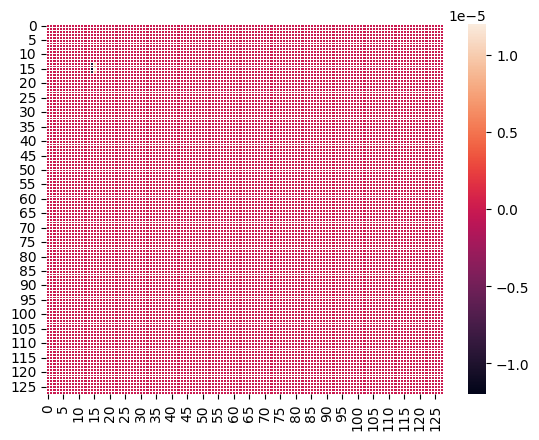

In [29]:
plot_difference(pi_wtk, pi_wtk_1)

# 4. Finding the optimal set for some UCR data

Tài liệu ví dụ về grid-search: [GridSearchKNN_Case_Study](https://github.com/pranav2chill/Grid-Search-in-KNN/blob/main/GridSearchKNN_Case_Study.ipynb)

Tài liệu ví dụ về cách sử dụng grid-search nâng cao: [Stack overflow](https://stackoverflow.com/questions/37924606/scikit-learn-how-do-we-define-a-distance-metrics-parameter-for-grid-search)

In [1]:
import logging
logging.basicConfig(level=logging.DEBUG)
from sklearn.metrics import accuracy_score
from getData import getData
from knn import knn_masking_map, knn_masking_map_pure
from ot_dis.wtk import wtk_distance
from arabic_load import get_train_data, get_test_data
from sklearn.model_selection import GridSearchCV
from ot_dis.mask_map import masking_map, masking_map_sequence, masking_map_partial
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm

DEBUG:matplotlib:matplotlib data path: c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:CONFIGDIR=C:\Users\Administrator\.matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is win32
DEBUG:matplotlib:CACHEDIR=C:\Users\Administrator\.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from C:\Users\Administrator\.matplotlib\fontlist-v330.json


In [2]:
def findTheShortestArray(list1, list2):
    min1 = min(list1, key=len)
    min2 = min(list2, key=len)
    min_len = min(len(min1), len(min2))
    frac1 = int(np.floor(min_len*10/100))
    frac2 = int(np.floor(min_len*30/100))
    frac3 = int(np.floor(min_len*50/100))
    frac4 = int(np.floor(min_len*70/100))
    frac5 = int(np.floor(min_len*90/100))
    min_array = [frac1, frac2, frac3, frac4, frac5]
    return min_array
size_list = [10, 30, 50, 70, 90]

In [3]:
def create_metric_param(size_array, lamb_limit):
    metric_param = []
    for i in range(1, lamb_limit):
        for index, kernel in enumerate(size_array):
            metric_param.append({
                "lamb": i, 
                "sub_length": kernel,
            })
    return metric_param

In [4]:
def knn_masking_map_pure(X_train, X_test, y_train, y_test, method="normal", k=1):
    size_array = findTheShortestArray(X_train, X_test)
    params = create_metric_param(size_array=size_array, lamb_limit=10)
    param_grid = [{
        'metric_params': params
    }]
    kpg_dict = {
        "sequence": masking_map_sequence,
        "normal": masking_map,
        "partial": masking_map_partial
    }
    clf = KNeighborsClassifier(n_neighbors = k, metric=kpg_dict[method], n_jobs=-1)
    clf = GridSearchCV(clf, param_grid, cv=5)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, clf

## BME

In [6]:
X_train, y_train, X_test, y_test = getData('BME', '../data/UCR/raw_data/')

In [7]:
size_array = findTheShortestArray(X_train, X_test)
size_array

[12, 38, 64, 89, 115]

In [8]:
for i in range(1, 6, 2):
    with open('../experiments/experiment_MM_sequence_optimal.txt', 'a') as file:
        file.write(f"BME (k={i}) ")
    accuracy, clf = knn_masking_map_pure(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, method="sequence", k=i)
    with open('../experiments/experiment_MM_sequence_optimal.txt', 'a') as file:
        file.write(f"Best score: {clf.best_score_} - Best param: {clf.best_params_['metric_params']}\n")
with open('../experiments/experiment_MM_sequence_optimal.txt', 'a') as file:
    file.write(f"--------------------------------------------------------------------------------------------------\n")

  0%|          | 0/3 [00:00<?, ?it/s]c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_M

## Chinatown

In [12]:
X_train, y_train, X_test, y_test = getData('Chinatown', '../data/UCR/raw_data/')

In [13]:
size_array = findTheShortestArray(X_train, X_test)
size_array

[2, 7, 12, 16, 21]

In [14]:
for i in range(1, 6, 2):
    with open('../experiments/experiment_MM_sequence_optimal.txt', 'a') as file:
        file.write(f"Chinatown (k={i}) ")
    accuracy, clf = knn_masking_map_pure(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, method="sequence", k=i)
    with open('../experiments/experiment_MM_sequence_optimal.txt', 'a') as file:
        file.write(f"Best score: {clf.best_score_} - Best param: {clf.best_params_['metric_params']}\n")
with open('../experiments/experiment_MM_sequence_optimal.txt', 'a') as file:
    file.write(f"--------------------------------------------------------------------------------------------------\n")

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
c:\Users\Administr

## BeetleFly

In [5]:
X_train, y_train, X_test, y_test = getData('BirdChicken', '../data/UCR/raw_data/')

In [6]:
size_array = findTheShortestArray(X_train, X_test)
size_array

[51, 153, 256, 358, 460]

In [7]:
for i in range(1, 6, 2):
    with open('../experiments/experiment_MM_sequence_optimal.txt', 'a') as file:
        file.write(f"BirdChicken (k={i}) ")
    accuracy, clf = knn_masking_map_pure(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, method="sequence", k=i)
    with open('../experiments/experiment_MM_sequence_optimal.txt', 'a') as file:
        file.write(f"Best score: {clf.best_score_} - Best param: {clf.best_params_['metric_params']}\n")
with open('../experiments/experiment_MM_sequence_optimal.txt', 'a') as file:
    file.write(f"--------------------------------------------------------------------------------------------------\n")

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
c:\Users\Administr

: 

# 5. Try new method

## OPW

In [9]:
import numpy as np
import math
from ot.bregman import sinkhorn, sinkhorn2
from ot.utils import list_to_array
import ot

In [10]:
def get_E_F(N, M):
    mid_para = np.sqrt((1/(N**2) + 1/(M**2)))

    a_n = np.arange(start=1, stop=N+1)
    b_m = np.arange(start=1, stop=M+1)
    row_col_matrix = np.meshgrid(a_n, b_m) 
    row = row_col_matrix[0].T / N 
    col = row_col_matrix[1].T / M 

    l = np.abs(row - col) / mid_para

    E =  1 / ((row - col) ** 2 + 1)
    F = l**2
    return E, F

In [11]:
def opw_sinkhorn(a, b, M,lambda1=50, lambda2=0.1, delta=1, method='sinkhorn', numItermax=1000, stopThr=1e-9, verbose=False, log=False, warn=True, **kwargs):
    r"""
    Solve the entropic regularization OPW and return the loss

    Args:
        X (ndarray): view1
        Y (ndarray): view2
        lambda1 (int, optional): weight of first term. Defaults to 50.
        lambda2 (float, optional): weight of second term. Defaults to 0.1.
        delta (int, optional): _description_. Defaults to 1.

    Returns:
        distance: distance is the distance between views
    """

    a, b, M = list_to_array(a, b, M)

    reg = lambda2

    E, F = get_E_F(a.shape[0], b.shape[0])
    M_hat = M - lambda1 * E + lambda2 * (F / (2 * delta ** 2) + np.log(delta * np.sqrt(2 * math.pi)))

    cost = sinkhorn2(a, b, M_hat, reg,method=method, numItermax=numItermax, stopThr=stopThr, verbose=verbose, log=log, warn=warn, **kwargs)
    transport_matrix = sinkhorn(a, b, M_hat, reg, method=method, numItermax=numItermax, stopThr=stopThr, verbose=verbose, log=log, warn=warn, **kwargs)
    return cost, transport_matrix

In [12]:
def opw_distance(M, lambd=1e-1, numItermax=100):
    rows, cols = M.shape
    a, b = np.ones((rows,)) / rows, np.ones((cols,)) / cols
    dist, matrix = opw_sinkhorn(a, b, M, lambd=lambd, numItermax=numItermax)
    return torch.tensor(dist), matrix

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Administrator\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-Italic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Administrator\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score

<Axes: >

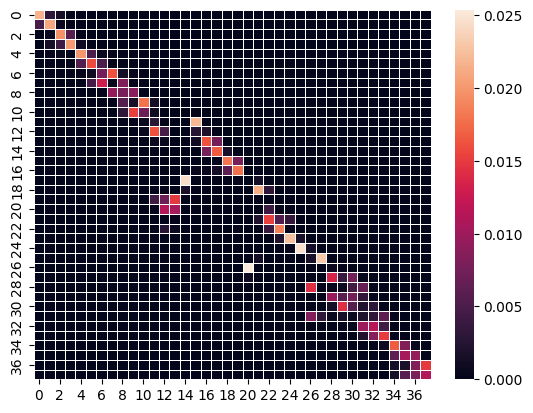

In [13]:
M = ot.dist(X_train_arabic[0], X_test_arabic[70], metric="euclidean")
cost, matrix = opw_distance(M=M, numItermax=10000)
sns.heatmap(matrix, linewidth=0.5)

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\ot\bregman.py:536: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x000001FB634FCF50>


<Axes: >

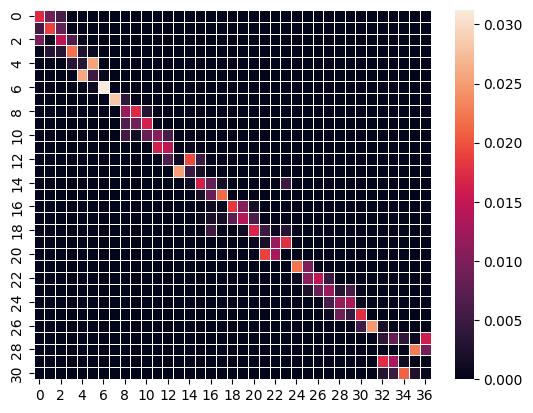

In [15]:
M = ot.dist(X_train_arabic[13], X_test_arabic[59], metric="euclidean")
cost, matrix = opw_distance(M=M, numItermax=100)
sns.heatmap(matrix, linewidth=0.5)

## New method

In [16]:
def create_I(n, m):
    a_n = np.arange(start=1, stop=n+1)
    b_m = np.arange(start=1, stop=m+1)
    row_col_matrix = np.meshgrid(a_n, b_m)
    row = row_col_matrix[0].T / n
    col = row_col_matrix[1].T / m
    I = 1 / ((row - col)**2 + 1)
    return I

In [17]:
def create_neighbor_relationship(xs):
    xs = np.array(xs)
    if xs.ndim == 1:
        xt = np.insert(xs, 0, np.zeros_like(xs[0]))[:-1]
        f = xs - xt
        f = f.reshape(-1, 1)
    else:
        xt = np.vstack((np.zeros_like(xs[0]),xs))[:-1]
        f = xs - xt
    d = np.linalg.norm(f, axis=1)
    f1 = np.cumsum(d)
    sum_dist = f1[len(f1)-1]
    return f1/sum_dist

In [18]:
def create_mask_KL(xs, xt, type=1):
    f1 = create_neighbor_relationship(xs)
    f2 = create_neighbor_relationship(xt)
    n = len(f1)
    m = len(f2)
    mid_para = np.sqrt((1/(n**2) + 1/(m**2)))
    M = np.zeros((n, m))
    for i in range(0, n):
        for j in range(0, m):
            if type == 1:
                if f1[i] == f2[j]:
                    M[i][j] = 1
                else: 
                    M[i][j] = max(f1[i], f2[j])/min(f1[i], f2[j])
            else:
                M[i][j] = np.abs(f1[i] - f2[j])/mid_para
    return M**2

In [19]:
def cost_matrix_2d(x, y):
    m = len(x)
    n = len(y)
    Cxy = np.zeros((m, n))
    for row in range(m):
        for col in range(n):
            Cxy[row, col] = np.linalg.norm(x[row] - y[col])
    return Cxy

In [20]:
I = create_I(len(X_train_arabic[0]), len(X_train_arabic[15]))
KL = create_mask_KL(X_train_arabic[0], X_train_arabic[15], type=2)
M = cost_matrix_2d(X_train_arabic[0], X_train_arabic[15])
I.shape, KL.shape, M.shape

((38, 26), (38, 26), (38, 26))

In [21]:
def opw_sinkhorn_new(a, b, M,KL, lambda1=50, lambda2=0.1, delta=1, method='sinkhorn', numItermax=1000, stopThr=1e-9, verbose=False, log=False, warn=True, **kwargs):
    r"""
    Solve the entropic regularization OPW and return the loss

    Args:
        X (ndarray): view1
        Y (ndarray): view2
        lambda1 (int, optional): weight of first term. Defaults to 50.
        lambda2 (float, optional): weight of second term. Defaults to 0.1.
        delta (int, optional): _description_. Defaults to 1.

    Returns:
        distance: distance is the distance between views
    """

    a, b, M, KL = list_to_array(a, b, M, KL)

    reg = lambda2

    I = create_I(a.shape[0], b.shape[0])
    M_hat = M - lambda1 * I + lambda2 * (KL / (2 * delta ** 2) + np.log(delta * np.sqrt(2 * math.pi)))

    cost = sinkhorn2(a, b, M_hat, reg,method=method, numItermax=numItermax, stopThr=stopThr, verbose=verbose, log=log, warn=warn, **kwargs)
    translation_matrix = sinkhorn(a, b, M_hat, reg, method=method, numItermax=numItermax, stopThr=stopThr, verbose=verbose, log=log, warn=warn, **kwargs)
    return cost, translation_matrix, M_hat

In [22]:
import matplotlib.pyplot as plt
def heat_map(M):
    plt.imshow(M, cmap='viridis')
    plt.colorbar()
    plt.show()

In [23]:
def new_distance(M, KL, lambd=1e-1, numItermax=100):
    rows, cols = M.shape
    a, b = np.ones((rows,)) / rows, np.ones((cols,)) / cols
    dist, matrix, M_hat = opw_sinkhorn_new(a, b, M, KL, lambd, numItermax=numItermax)
    return torch.tensor(dist), matrix, M_hat

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x000001FB634B2650>


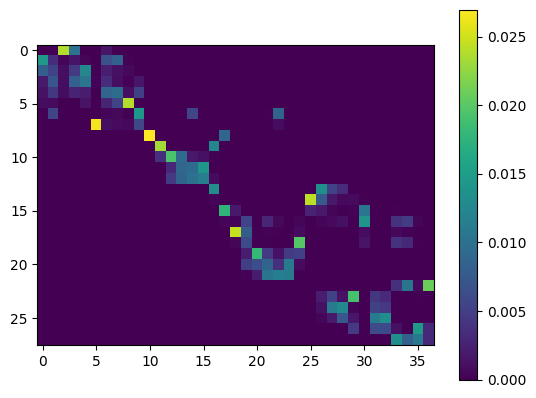

(None, tensor(3.6583, dtype=torch.float64))

In [24]:
KL = create_mask_KL(X_train_arabic[10], X_train_arabic[25], type=2)
M = cost_matrix_2d(X_train_arabic[10], X_train_arabic[25])
cost_arabic, matrix_arabic, M_hat_arabic = new_distance(M=M, KL=KL, numItermax=1000)
heat_map(matrix_arabic), cost_arabic

In [36]:
X_train_motion[0].shape

(6, 100)

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\ot\bregman.py:536: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x000001FB64B16CD0>


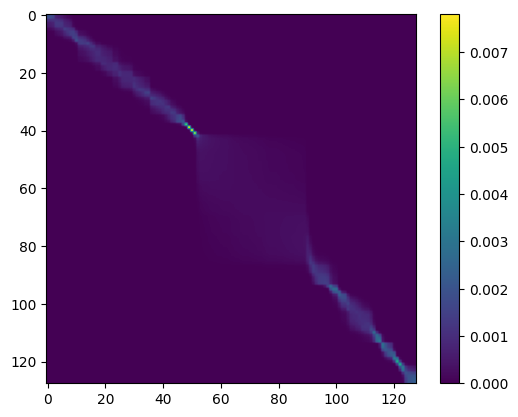

In [37]:
KL = create_mask_KL(X_train[10], X_test[134], type=2)
M = cost_matrix_2d(X_train[10], X_test[134])
cost, matrix, M_hat = new_distance(M=M, KL=KL, numItermax=1000)
heat_map(matrix)

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x000001AA061F4710>


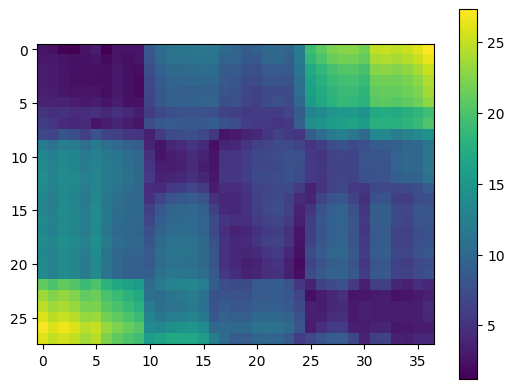

In [214]:
heat_map(M_hat_arabic)

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x000001CFD86EB7D0>


<Axes: >

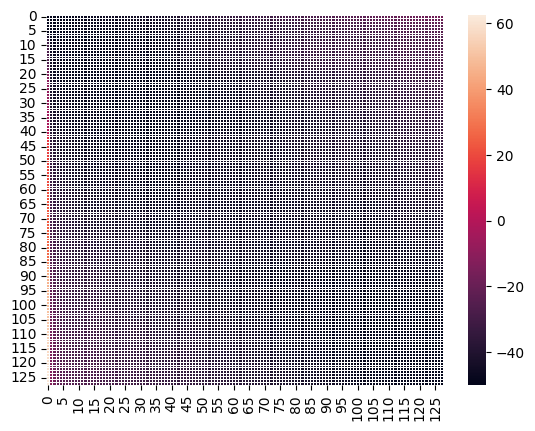

In [42]:
sns.heatmap(M_hat, linewidth=0.5)

In [24]:
def create_mask_1(xs, xt, lamb):
    f1 = create_neighbor_relationship(xs)
    f2 = create_neighbor_relationship(xt)
    n = len(f1)
    m = len(f2)
    M = np.zeros((n, m))
    for i in range(0, n):
        for j in range(0, m):
            if 1-np.abs(f1[i]-f2[j]) > lamb:
                M[i][j] = 1
            else:
                M[i][j] = 0
    return M

In [11]:
def create_mask(xs, xt, lamb=0.8, k=5):
    f1 = create_neighbor_relationship(xs)
    f2 = create_neighbor_relationship(xt)
    n = len(f1)
    m = len(f2)
    M = np.zeros((n, m))
    for i in range(0, n):
        for j in range(0, m):
            if (i > j*n/m - k) & (i < j*n/m + k):
                if f1[i] == f2[j]:
                    M[i][j] = 1
                elif np.abs(min(f1[i],f2[j])/max(f1[i],f2[j])) > lamb:
                    M[i][j] = 1
                else:
                    M[i][j] = 0
    return M

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Administrator\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-Italic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Administrator\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score

<Axes: >

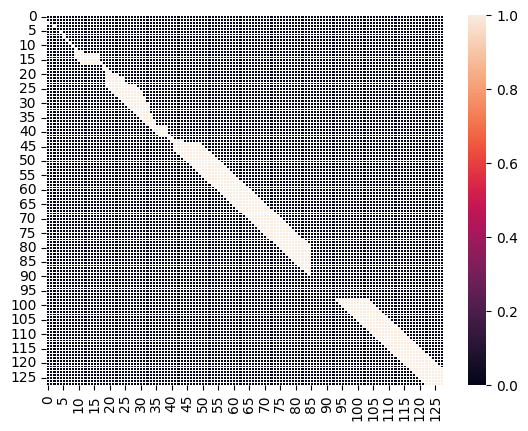

In [15]:
M1 = create_mask(xt, xs, 0.9, 6)
sns.heatmap(M1, linewidth=0.5)

In [13]:
from ot_dis.mask_map.utils import cost_matrix, cost_matrix_1d
from ot_dis.mask_map import linearprog
def masking_map_DT_X(xs, xt, lamb=0.8, k=5, s=None, sub_length=None, gamma=None, eps=1e-10, reg=0.0001, max_iterations=100000, thres=1e-5, algorithm="linear_programming", plot=False):
    '''
    Parameters
    ----------
        xs: ndarray, (m,d)
            d-dimensional source samples
        xt: ndarray, (n,d) 
            d-dimensional target samples
        lamb: lambda, int 
            Adjust the diagonal width. Default is 3
        algorithm: str
            algorithm to solve model. Default is "linear_programming". Choices should be
            "linear_programming" and "sinkhorn"
        plot: bool
            status for plot the optimal transport matrix or not. Default is "False"
    Returns
    ------- 
        cost: Transportation cost
    '''
    p = np.ones(len(xs))/len(xs)
    q = np.ones(len(xt))/len(xt)
    
    if xs.ndim == 1: 
        C = cost_matrix_1d(xs, xt)
    elif xs.ndim == 2:
        C = cost_matrix(xs, xt)
    else:
        raise ValueError("The data must in the form of 1d or 2d array")
    C /= (C.max() + eps)

    ## mask matrix
    M = create_mask(xs, xt, lamb, k)

    ## solving model
    if algorithm == "linear_programming":
        pi = linearprog.lp_partial(p,q,C,M)
    elif algorithm == "sinkhorn":
        pi = sinkhorn.sinkhorn_log_domain(p,q,C,M,reg,max_iterations,thres)
    else:
        raise ValueError("algorithm must be 'linear_programming' or 'sinkhorn'!")
    
    cost = np.sum(pi * C.numpy())
    #cost = np.exp(-gamma * cost)
    if plot:
        sns.heatmap(pi, linewidth=0.5)
        return pi, cost
    return cost 

In [14]:
masking_map_DT_X(xs_arabic, xt_arabic, plot=True)

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


ValueError: cannot reshape array of size 1 into shape (7,38)